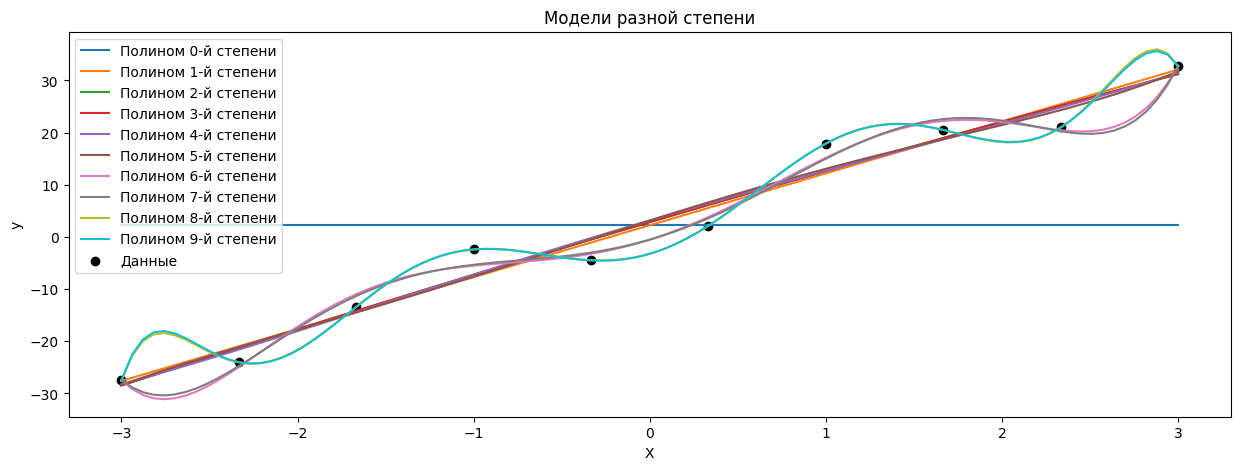

   Степень полинома  Ошибка на трейне  Ошибка с оптимальной α=10.000
0                 0      3.746331e+02                     374.633136
1                 1      1.175185e+01                      21.751853
2                 2      1.147425e+01                      31.474247
3                 3      1.147413e+01                      41.474132
4                 4      1.140493e+01                      51.404930
5                 5      1.130262e+01                      61.302619
6                 6      3.177684e+00                      63.177684
7                 7      3.128662e+00                      73.128662
8                 8      3.530425e-04                      80.000353
9                 9      1.033852e-21                      90.000000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd

# Генерация синтетических данных на основе полинома 1-й степени с шумом
np.random.seed(42)
X_train = np.linspace(-3, 3, 10).reshape(-1, 1)  # 10 точек
y_train = 10 * X_train + np.random.normal(scale=5, size=X_train.shape)

# Степени полинома для модели
degrees = list(range(10))
alpha = 10  # коэффициент регуляризации

# пеналти = квадратиная ошибка на обучающей выборке + 10 * степень_многочлена

# Для хранения ошибок
train_errors = []
regularized_errors = []

# Визуализация моделей
plt.figure(figsize=(15, 5))

X_smooth = np.linspace(-3, 3, 100).reshape(-1, 1)

models = []
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    models.append(model)
    y_pred = model.predict(X_train)
    
    # Ошибка на трейне (MSE)
    train_error = mean_squared_error(y_train, y_pred)
    train_errors.append(train_error)
    
    # Ошибка с регуляризацией (MSE + alpha * degree)
    reg_error = train_error + alpha * degree
    regularized_errors.append(reg_error)
    
    # Визуализация
    y_smooth_pred = model.predict(X_smooth)
    plt.plot(X_smooth, y_smooth_pred, label=f'Полином {degree}-й степени')

plt.scatter(X_train, y_train, color='black', label='Данные')
plt.legend()
plt.title("Модели разной степени")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Визуализация ошибок
errors_df = pd.DataFrame({
    "Степень полинома": degrees,
    "Ошибка на трейне": train_errors,
    f"Ошибка с оптимальной α={alpha:.3f}": regularized_errors
})

print(errors_df)

# многчлен нулевой степени - недообучение
# многочлены большой степени - переобучение
# многолен первоый степени - в самый раз!


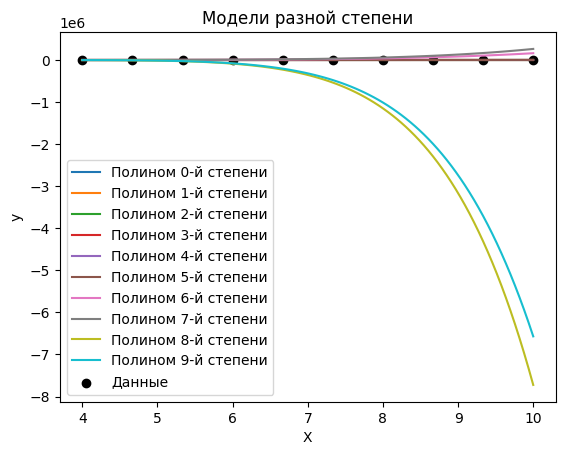

   Степень полинома  Ошибка на тесте
0                 0     4.756033e+03
1                 1     2.787089e+01
2                 2     5.099648e+01
3                 3     4.050573e+01
4                 4     1.765711e+04
5                 5     1.398268e+06
6                 6     4.367481e+09
7                 7     1.119742e+10
8                 8     8.518699e+12
9                 9     6.219585e+12


In [19]:
X_test = np.linspace(4, 10, 10).reshape(-1, 1)  # 10 точек
y_test = 10 * X_test + np.random.normal(scale=5, size=X_test.shape)

test_errors = []

X_smooth = np.linspace(4, 10, 100).reshape(-1, 1)

for i, degree in enumerate(degrees):
    model = models[i]
    y_pred = model.predict(X_test)
    
    # Ошибка на трейне (MSE)
    test_error = mean_squared_error(y_test, y_pred)
    test_errors.append(test_error)
    
    # Визуализация
    y_smooth_pred = model.predict(X_smooth)
    plt.plot(X_smooth, y_smooth_pred, label=f'Полином {degree}-й степени')
plt.scatter(X_test, y_test, color='black', label='Данные')
plt.legend()
plt.title("Модели разной степени")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Визуализация ошибок
errors_df = pd.DataFrame({
    "Степень полинома": degrees,
    "Ошибка на тесте": test_errors
})

print(errors_df)

# ошибка для многочленов больших степеней огромна!!!111 - типичный пример переобучения
# ощибка для многочлена нулевой степени (=константы) также велика - недообучение